# CS 6320 Project 2: Detecting Lines and Circles using Hough Transform

A notebook contains many blocks of code, each of which can be run independently. You can run a cell with ctrl+enter or shift+enter (to move to the next cell).


You are expected to complete this notebook with lines of code, plots and texts. You will need to create new cells with original code or text for your analyses and explanations. Explain what you do and analyze your results. This assignment has a total of 100 points.

## Brief
    Hand-in: through Gradescope
    Required files: <your_uid>.zip.(Please begin with 'u' for your uid)
<!---<your_uid>_proj1.pdf--> 


## Setup

   0. Unzip proj2_6320.zip and go to proj2_6320 directory.
      - You can run `unzip proj2_6320.zip && cd proj2_6320` in your terminal.
   1. Install [Miniconda](https://docs.conda.io/en/latest/miniconda.html). It doesn’t matter whether you use Python 2 or 3 because we will create our own environment that uses 3 anyways.
   2. Create a conda environment using the appropriate command. On Windows, open the installed “Conda prompt” to run the command. On MacOS and Linux, you can just use a terminal window to run the command, Modify the command based on your OS (linux, mac, or win): `conda env create -f proj2_env_<OS>.yml`.
    - NOTE that proj2_env.yml is inside the project folder.
   3. This should create an environment named ‘proj2’. Activate it using the Windows command, activate proj2 or the MacOS / Linux command, source activate proj2
   4. Run the notebook using `jupyter notebook` under *proj2_6320* directory.
   5. Ensure that all sanity checks are passing by running pytest tests inside the repo folder.
   6. Generate the zip folder for the code portion of your submission once you’ve finished the project using 
    
        `python zip_submission.py --uid <your_uid>` 


## Library Functions
Do not use any library functions that implement Hough Transform in your solution. You can use functions to perform fitlering etc.

## Debugging
We have included several synthetic images of lines and circles to help test your methods in simpler domains if you'd like.

## Writeup
For this project, this notebook itself is the report. You must run all your cells before you hand in it. You code, results, visualization, and discussion will be used for the grading. You will be deducted points if the results are not shown in this notebook. Do not change the order of the cells. You can add cells in need. You can copy a cell and run it seperately if you need to run a cell multiple times and thus every result is displayed in the cell.


## Rubric
    +26 pts: Ques_1
    +12 pts: Ques_2
    +15 pts: Ques_3
    +17 pts: Ques_4
    +15 pts: Ques_5
    +15 pts: Ques_6

    Distribution of the points in a Question is separately mentioned for each sub-task

    -5*n pts: Lose 5 points for every time you do not follow the instructions for the hand-in format.
    
Submission Format

This is very important as you will lose 5 points for every time you do not follow the instructions. You will attach two items in your submission on Canvas:

1. <your_uid>.zip containing:
    - proj2_code/ - directory containing all your code for this assignment
    - data/       - directory containing all the input images
    - results/    - directory containing all your output images

Do not install any additional packages inside the conda environment. The TAs will use the same environment as defined in the config files we provide you, so anything that’s not in there by default will probably cause your code to break during grading. Do not use absolute paths in your code or your code will break. Use relative paths like the starter code already does. Failure to follow any of these instructions will lead to point deductions. Create the zip file using python zip_submission.py --uid <your_uid> (it will zip up the appropriate directories/files for you!)

# NOTE - I would like to use my 1/3 free late submission. Thanks

In [1]:
import numpy as np
import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt
import math

In [2]:
## Additional code to create directories for saving
import os
if not os.path.exists('../results/Ques_1'):
    os.makedirs('../results/Ques_1')
if not os.path.exists('../results/Ques_2'):
    os.makedirs('../results/Ques_2')
if not os.path.exists('../results/Ques_3'):
    os.makedirs('../results/Ques_3')
if not os.path.exists('../results/Ques_4'):
    os.makedirs('../results/Ques_4')
if not os.path.exists('../results/Ques_5'):
    os.makedirs('../results/Ques_5')
if not os.path.exists('../results/Ques_6'):
    os.makedirs('../results/Ques_6')

### 1 Processing an image to detect lines using Hough Transform (26 points)

In this question, we process an image and apply Hough Transform on the processed image

#### Tasks:
1. Compute a smooth version of the Input Image <b>(4 points)</b>
2. Detect edges from Images <b>(6 points)</b>
3. Implement Hough Transform <b>(8 points)</b>
4. Apply Hough Transform to detect lines from images <b>(4 points)</b>
5. Apply Hough Transform to detect edges from images <b>(4 points)</b>

#### 1.1 Compute a smooth version of the Input Image

##### You should use a Gaussian filter to generate a smooth image 

##### Please note:
The function takes in as input only the sigma value (integer only).<br>
The size of the filter should be computed using the sigma value

In [3]:
def Gaussian_Filter(sigma):
    '''
    The function takes in as input only the sigma
    and generates a filter using the sigma value
    The size of the filter should be computed using the sigma value
    '''

    ##############################
    # TO DO: Your Implementation
    ##############################
    ### get the kernel size from sigma
    ksize = int(((sigma - 0.8)/0.3 + 1)*2 + 1)
    ## taking ciel into account as int does floor - don't want even kernel size
    ksize = ksize + 1 if ksize % 2 == 0 else ksize
    #print(f"Kernel size = {ksize}")
    
    ### using outer product of 2 1d gaussian kernels
    kernel1d = np.zeros((ksize))
    for i in range(ksize):
        kernel1d[i] = (1 / np.sqrt(2*np.pi*(sigma**2))) * np.exp(-((i**2)/(2*(sigma**2))))
    kernel = np.outer(kernel1d, kernel1d)
    
    # ### 2d gaussian kernel directly
    # kernel = np.zeros((ksize, ksize))
    # for i in range(ksize):
    #     for j in range(ksize):
    #         kernel[i,j] = (1 / (2*np.pi*(sigma**2))) * np.exp(-(((i**2)+(j**2))/(2*(sigma**2))))
            
    return kernel
    ################################
    # Your Implementation ENDS here
    ################################

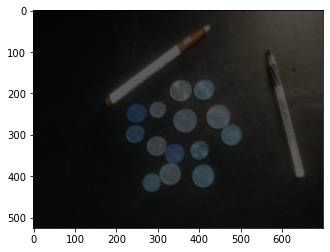

In [4]:
# Reading the Input Image
img        = cv.imread('../data/proj2-clean-image.jpg')

# Generates the Gaussian Filter
g_kernel   = Gaussian_Filter(2)

# Smoothing the image with the Gaussian Filter
smooth_img = cv.filter2D(img, -1, g_kernel)

# Saves the Smooth Image in the result directory
cv.imwrite("../results/Ques_1/proj2-clean-image-smoothed.png", smooth_img)

# Plots the smoothed image in the notebook
plt.figure(); plt.imshow(smooth_img.astype(np.uint8));

In [5]:
def rgb2gray(rgb):
    '''
    Converts the RGB image to the Gray Scale
    '''

    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

In [6]:
def image_uint(input_arr):
    '''
    Scales the image intensity values to the range [0, 255]
    '''

    return (255.0*(input_arr - np.min(input_arr))/(np.max(input_arr) - np.min(input_arr))).astype(np.uint8)

#### 1.2 Edge Detector
Now we need to extract the edges from the input images. This is as essential step towards detection of lines and circles from the image.

#### You should define a Sobel filter to detect edges in the Original and Smooth Image
Following the definition of the filter, you convolve the filter over the input image using OpenCV library function, <b>filter2D()</b>. You are not required to write any convolution function to apply the filter.

You are required to detect edges on both the <b>original</b> and <b>smooth</b> images.

<b>Do you observe any difference between them? Please comment in a separate cell.</b>

#### 1.2.1 Edge Detector on the Original Image
Please remember the edge detection method should be applied on <b>gray images</b>.
The edge image should be saved as <b>img_gray_edge</b>.

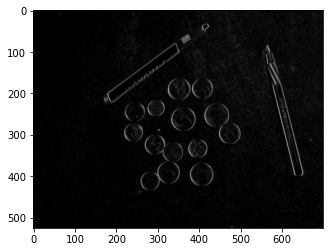

In [7]:
##############################
# TO DO: Your Implementation
##############################
sobel_horizontal = np.array([[1, 0, -1],
                             [2, 0, -2],
                             [1, 0, -1]])

sobel_vertical = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])
gray = rgb2gray(img)

img_gray_edge_h = cv.filter2D(gray, -1, sobel_horizontal)
img_gray_edge_v = cv.filter2D(gray, -1, sobel_horizontal)
img_gray_edge = np.hypot(img_gray_edge_h, img_gray_edge_v)
img_gray_edge = image_uint(img_gray_edge)
################################
# Your Implementation ENDS here
################################

# Save the Image
cv.imwrite('../results/Ques_1/Ori_Clean_Edge_Image.png', img_gray_edge)

#Plot the Image
plt.figure(); plt.imshow(img_gray_edge.astype(np.uint8), cmap='gray');

#### 1.2.2 Edge Detector on the Smooth Image
Please remember the edge detection method should be applied on <b>gray images</b>.
The edge image should be saved as <b>smooth_img_gray_edge</b>.

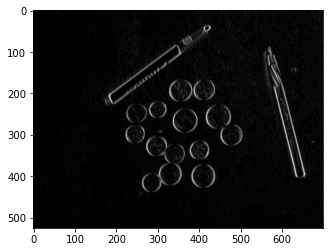

In [8]:
##############################
# TO DO: Your Implementation
##############################
sobel_horizontal = np.array([[1, 0, -1],
                             [2, 0, -2],
                             [1, 0, -1]])

sobel_vertical = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])
gray = rgb2gray(img)
g_kernel   = Gaussian_Filter(2)
gray_smooth = cv.filter2D(gray, -1, g_kernel)
smooth_img_gray_edge_h = cv.filter2D(gray_smooth, -1, sobel_horizontal)
smooth_img_gray_edge_v = cv.filter2D(gray_smooth, -1, sobel_horizontal)
smooth_img_gray_edge = np.hypot(smooth_img_gray_edge_h, smooth_img_gray_edge_v)
smooth_img_gray_edge = image_uint(smooth_img_gray_edge)
################################
# Your Implementation ENDS here
################################

# Save the Image
cv.imwrite('../results/Ques_1/Smooth_Clean_Edge_Image.png', smooth_img_gray_edge)

#Plot the Image
plt.figure(); plt.imshow(smooth_img_gray_edge.astype(np.uint8), cmap='gray');

**Ans -** The edges seem more pronounced or of greater intensity in smoothed image as compared to the original image. Smoothing is done to ensure that the noise doesn't affect the edge detection.

#### 1.3 Hough Transform to detect Lines
In this exercise you are expected to implement Hough Transform for line detection as discussed in class. Hough Transform uses an accumulator array to capture the lines present in image. It is applied on binary images which can be generated by thresholding the edge detector output.<br>

For this exercise, the range of theta is <b>[-90, 90]</b> and the range of rho is <b>[-img_diag, img_diag]</b>.

In [9]:
def hough_transform(input_img, threshold, theta_res, rho_res):

    '''
    This function computes the Accumulator array
    
    Input:
    1. Output of the Edge Detection Method
    2. Threshold value for generating the binary image
    3. Resolution for Angle
    4. Resolution for Perpendicular Distance from the Origin (Rho)
    
    Output:
    1. Accumulator array       , declare as accumulator
    2. Array of Theta          , declare as thetas
    3. Array of Rho            , declare as rhos
    4. Thresholded Binary Image, declare as binary_img

    '''

    ##############################
    # TO DO: Your Implementation
    ##############################
    h,w = input_img.shape
    thetas = np.arange(-90, 90, theta_res)
    img_diag = np.sqrt(h**2 + w**2)
    rhos = np.arange(-img_diag, img_diag, rho_res)
    accumulator = np.zeros((len(rhos), len(thetas)))
    binary_img = input_img.copy()
    binary_img[binary_img<threshold] = 0
    edge_points = np.transpose(np.nonzero(binary_img))

    for edge_point in edge_points:
        edge_point = [edge_point[0] - h/2, edge_point[1] - w/2]
        for theta in thetas:
            d = (edge_point[1] * math.cos(np.deg2rad(theta))) - (edge_point[0] * math.sin(np.deg2rad(theta)))
            di = np.abs(rhos-d).argmin()
            ti = np.abs(thetas-theta).argmin()
            accumulator[di, ti] += 1
    ################################
    # Your Implementation ENDS here
    ################################

    return accumulator, thetas, rhos, binary_img



#### 1.3.1 Hough Transform to detect Lines from Original Image

Use the edges detected from the <b>original input image</b> to apply Hough Transform function.<br>
<br>

You need to find a resaonable estimate of the threshold for generating the binary image which is good enough for the Hough transform to extract lines. Please discuss the effect of the threshold on the performance of the algorithm.

Plot the Accumulator Array using the matplotlib function, figure size (20, 20), with proper labeling and title. The image should be saved as <b>Ori_Clean_Image_Accumulator_Array.png</b> in results/Ques_1 sub-directory.


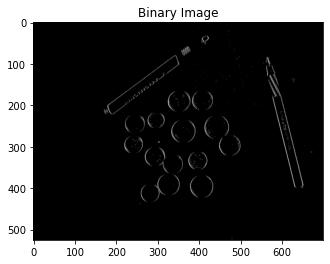

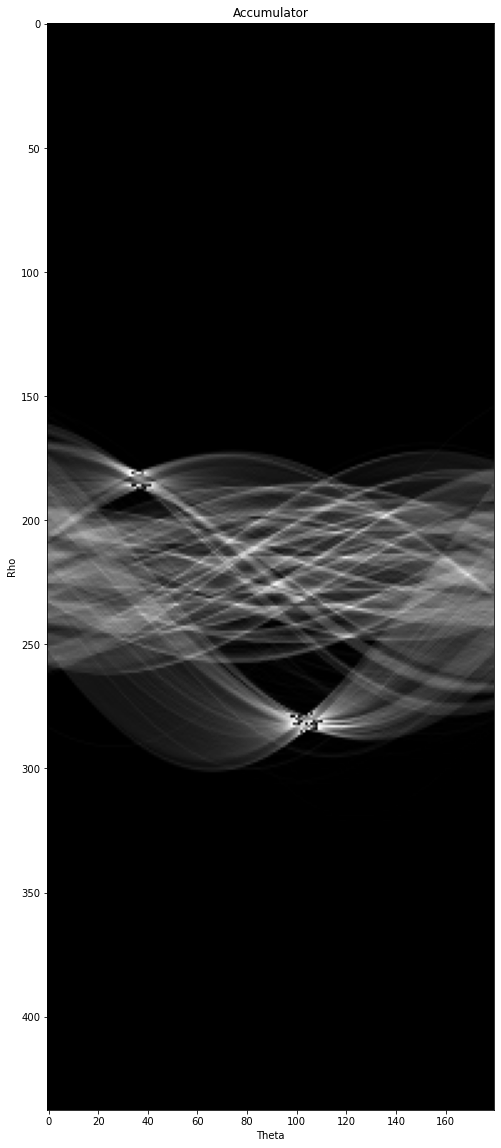

In [10]:
# Invoke the Hough Transform Method to Extract the Lines from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract the lines
# To expedite the process you can play with the resolution of the theta and rho 
# without compromising the quality of the results

ori_accumulator, ori_thetas, ori_rhos, ori_binary_img = hough_transform(img_gray_edge, 50, 1, 4)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_1/Ori_Clean_Binary_Image.png', ori_binary_img)

#Plot the Binary Image
plt.figure(); plt.imshow(ori_binary_img.astype(np.uint8), cmap='gray'); plt.title('Binary Image')


# Plot Accumulator Array
##############################
# TO DO: Your Implementation
##############################
plt.figure(figsize=(20, 20)); 
plt.xlabel("Theta")
plt.ylabel("Rho")
plt.imshow(ori_accumulator.astype(np.uint8), cmap='gray'); plt.title('Accumulator')
plt.savefig('../results/Ques_1/Ori_Clean_Image_Accumulator_Array.png')
################################
# Your Implementation ENDS here
################################

**Ans -** Even the edges image has some noise, it has some pixels which correspond to gradient change but are not actually edges, so we threshold the edge image to remove low intensity false positives estimates for edges. At lower threshold the algorithm has to go over more edge point to check if they correspond to a line it will take more time to run also more possibility of detecting false positive, but as we keep on incresing the threshold the algorithm will take less time to run also give better lines as we are removing the edge points below the certain value, this will go on until an optimum value after that increasing the threshold might work againts the algoritm as it might remove important information from the edge image.

For plotting lines (infinite) in the images, you should use the OpenCV <b>line</b> function which can hold all the lines and then you could overlay them on the input image.

In [11]:
def plot_lines(img_path, accumulator, thetas, rhos, acc_threshold, save_path):

    '''
    This function plots infinite lines
    This should be used to draw lines along the boundary of the pens
    
    Input:
    1. RGB Image for plotting lines
    2. Accumulator array
    3. Vector of the angle values
    4. Vector of the rho values
    5. Threshold value for selecting lines from the accumulator
    6. Path to save the image with lines drawn on them
    
    Output:
    Returns Nothing
    Saves the output image in save_path
    '''

    ##############################
    # TO DO: Your Implementation
    ##############################
    image = cv.imread(img_path)
    h,w,c = image.shape
    #print(np.max(accumulator))
    line_points = np.where(accumulator>acc_threshold)
    for i in range(len(line_points[0])):
        theta = thetas[line_points[1][i]]
        rho = rhos[line_points[0][i]]
        a = math.cos(np.deg2rad(theta))
        b = -math.sin(np.deg2rad(theta))
        x0 = (a * rho) + (w/2)
        y0 = (b * rho) + (h/2)
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(image, pt1, pt2, (0,255,0), 3)
        
    cv.imwrite(save_path, image)
    ################################
    # Your Implementation ENDS here
    ################################

In [12]:
# Plot the Lines extracted on the Original Image
# Play with the Accumulator Thresholding to get rid of the unwanted lines

plot_lines('../data/proj2-clean-image.jpg', ori_accumulator, ori_thetas, ori_rhos, acc_threshold=480, save_path='../results/Ques_1/Ori_Clean_Image_Output_Lines.png')

#### 1.3.2 Hough Transform to detect Lines from the Smooth Image

Use the edges detected from the <b>smooth input image</b> to apply Hough Transform function.<br>
<br>

You need to find a resaonable estimate of the threshold for generating the binary image which is good enough for the Hough transform to extract lines. Please discuss the effect of the threshold on the performance of the algorithm.

Plot the Accumulator Array using the matplotlib function, figure size (20, 20), with proper labeling and title. The image should be saved as <b>Smooth_Clean_Image_Accumulator_Array.png</b> in results directory.

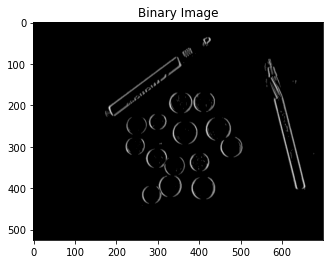

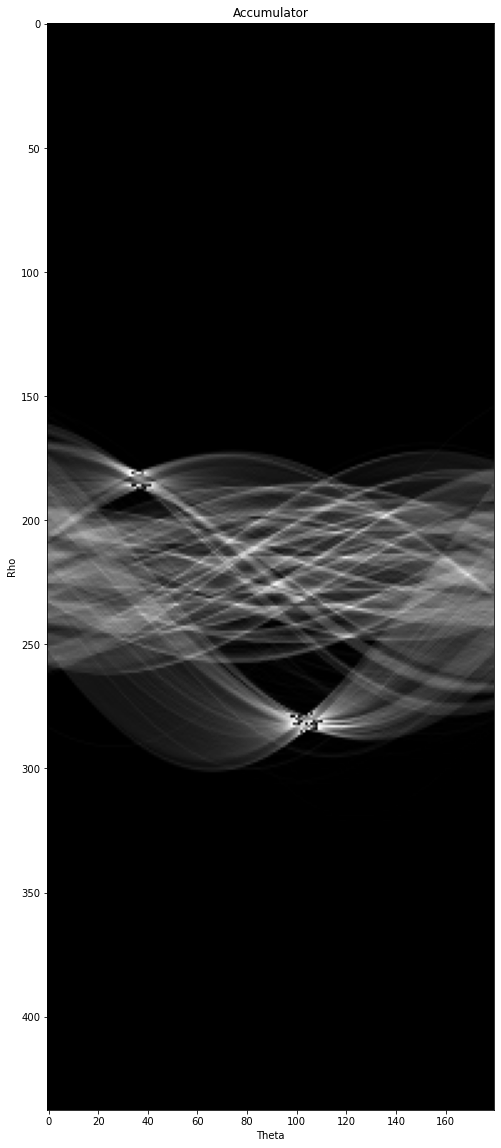

In [13]:
# Invoke the Hough Transform Method to Extract the Lines from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract the lines
# To expedite the process you can play with the resolution of the theta and rho 
# without compromising the quality of the results

smooth_accumulator, smooth_thetas, smooth_rhos, smooth_binary_img = hough_transform(smooth_img_gray_edge, threshold=50, theta_res=4, rho_res=4)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_1/Smooth_Clean_Binary_Image.png', smooth_binary_img)

#Plot the Binary Image
plt.figure(); plt.imshow(smooth_binary_img.astype(np.uint8), cmap='gray'); plt.title('Binary Image') 

##############################
# TO DO: Your Implementation
##############################
plt.figure(figsize=(20, 20))
plt.xlabel("Theta")
plt.ylabel("Rho")
plt.imshow(ori_accumulator.astype(np.uint8), cmap='gray'); plt.title('Accumulator')
plt.savefig('../results/Ques_1/Smooth_Clean_Image_Accumulator_Array.png')
################################
# Your Implementation ENDS here
################################

In [14]:
# Plot the Lines extracted on the Smooth Image
# Play with the Accumulator Thresholding to get rid of the unwanted lines

plot_lines('../results/Ques_1/proj2-clean-image-smoothed.png', smooth_accumulator, smooth_thetas, smooth_rhos, acc_threshold=600, save_path='../results/Ques_1/Smooth_Clean_Image_Output_Lines.png')

**Ans -** Even the edges image has some noise, it has some pixels which correspond to gradient change but are not actually edges, so we threshold the edge image to remove low intensity false positives estimates for edges. At lower threshold the algorithm has to go over more edge point to check if they correspond to a line it will take more time to run also more possibility of detecting false positive, but as we keep on incresing the threshold the algorithm will take less time to run also give better lines as we are removing the edge points below the certain value, this will go on until an optimum value after that increasing the threshold might work againts the algoritm as it might remove important information from the edge image.

#### 1.4 Hough Transform to detect Edges

Plot the Edges instead of Lines (infinite) along the boundary of the pens.

you should use the OpenCV <b>line</b> function which can hold all the edges and you could then overlay them on the input image.

In [15]:
def plot_edges(img_path, accumulator, thetas, rhos, acc_threshold, binary_image, save_path):

    '''
    This function plots edges
    This should be used to draw edges along the boundary of the pens
    
    Input:
    1. RGB Image for plotting lines
    2. Accumulator array
    3. Vector of the angle values
    4. Vector of the rho values
    5. Threshold value for selecting lines from the accumulator
    6. Path to save the image with lines drawn on them
    
    '''
    image = cv.imread(img_path)
    h,w,c = image.shape
    print(np.max(accumulator))
    line_points = np.where(accumulator>acc_threshold)
    edge_points = np.transpose(np.nonzero(binary_image)).astype(float)
    
        
    for i in range(len(line_points[0])):
        theta = thetas[line_points[1][i]]
        rho = rhos[line_points[0][i]]
        a = np.cos(np.deg2rad(theta))
        b = np.sin(np.deg2rad(theta))

        xt = edge_points[:,1] - (w/2)
        y = (a*xt - rho)/b + (h/2)
        lps = np.where(np.abs(y-edge_points[:,0])<3)
        
        if len(lps[0]) > 1:
            ept = edge_points[lps[0]]
            min_pt = np.min(ept[ept[:, 0] == np.min(ept[:, 0])], 0).astype(int)
            max_pt = np.max(ept[ept[:, 0] == np.max(ept[:, 0])], 0).astype(int)
            cv.line(image, (min_pt[1], min_pt[0]), (max_pt[1], max_pt[0]), (0,0,255), 3, cv.LINE_AA)
            
    cv.imwrite(save_path, image)

In [16]:
# Plot the Boundaries of the Pen on the Real Image
# This unlike the previous result is restricted to a finite length line
# Play with the Accumulator Thresholding to get rid of the unwanted lines

plot_edges('../data/proj2-clean-image.jpg', ori_accumulator, ori_thetas, ori_rhos, 470, ori_binary_img, save_path='../results/Ques_1/Ori_Clean_Image_Output_Edges.png')

661.0


In [17]:
# Plot the Boundaries of the Pen on the Smooth Image
# This unlike the previous result is restricted to a finite length line
# Play with the Accumulator Thresholding to get rid of the unwanted lines

plot_edges('../results/Ques_1/proj2-clean-image-smoothed.png', smooth_accumulator, smooth_thetas, smooth_rhos, 600, smooth_binary_img, save_path='../results/Ques_1/Smooth_Clean_Image_Output_Edges.png')

883.0


### 2. Hough Transform to detect Circles (12 points)
In this exercise you are expected to implement Hough Transform for circle detection in images as discussed in class. Hough Transform uses an accumulator array to capture the circles present in image. As a circle could be defined with three parametrs, center (along X and Y axis) and radius, we need a three-dimensional accumulator to store the circle information.

#### Tasks:
1. Hough Transform to detect circles from the Images <b>(8 points)</b>
2. Plot the detected circles on the corresponding images <b>(4 points)</b>

You need to perform the task on the <b>Original Image</b> and <b>Smooth Image</b> computed earlier.

It is applied on <b>binary images</b> which can be generated by thresholding the edge detector output.<br>
You should use the result of the previous edge detection task as input for this exercise.

<b>The center of the circle should be computed using the parametric equations.</b>

In [18]:
def circle_hough_transform(input_img, threshold, min_radius, max_radius, radius_res, angle_res):

    '''
    This function computes the accumulator array with the circles
    detected in the image
    
    Input:
    1. Output of the Edge Detection Method
    2. Threshold value for generating the binary image
    3. Min Radius of the Circle to be detected
    4. Max Radius of the Circle to be detected
    5. Resolution for Circle Radius
    6. Angle resolution for parametric equation of circle
    
    Output:
    1. Accumulator array          , declare as accumulator
    2. Array for Circle Center    , declare as center_x_vector, center_y_vector
    3. Array for Radius of Circle , declare as radius_vector
    4. Thresholded Binary Image   , declare as binary_img

    '''

    ############################
    # To DO: Your Implementation
    ############################
    h,w = input_img.shape
    thetas = np.arange(0, 360, angle_res)
    radius_vector = np.arange(min_radius, max_radius, radius_res)
    center_x_vector = np.arange(-w, w, 1)
    center_y_vector = np.arange(-h, h, 1)
    accumulator = np.zeros((len(center_x_vector), len(center_y_vector), len(radius_vector)))
    binary_img = input_img.copy()
    binary_img[binary_img<threshold] = 0
    edge_points = np.transpose(np.nonzero(binary_img))

    for edge_point in edge_points:
        for radius in radius_vector:
            for theta in thetas:
                a = edge_point[1] - radius*math.cos(np.deg2rad(theta))
                b = edge_point[0] - radius*math.sin(np.deg2rad(theta))
                ai = np.abs(center_x_vector-a).argmin()
                bi = np.abs(center_y_vector-b).argmin()
                ri = np.abs(radius_vector-radius).argmin()
                accumulator[ai, bi, ri] += 1
    
    ################################
    # Your Implementation ENDS here
    ################################

    return accumulator, radius_vector, center_x_vector, center_y_vector, binary_img


#### 2.1.1 Hough Transform to detect Circles from the Original Image

Use the edges detected from the <b>original input image</b> to apply Hough Transform function.<br>

You need to find a resaonable estimate of the threshold for generating the binary image which is good enough for the Hough transform to extract circles. Please discuss the effect of the threshold on the performance of the algorithm.

##### Please note that you should be able to extract atleast 7 coins. This ensures 75% of the credit.

In [19]:
# Invoke the Hough Transform Method to Extract the Circles from the Image
# To expedite the process you can play with the resolution parameters 
# without compromising the quality of the results

ori_circle_accumulator, ori_circle_radius_vector, ori_circle_center_x_vector, ori_circle_center_y_vector, ori_circle_img_bin = circle_hough_transform(img_gray_edge, threshold=50, min_radius=20, max_radius=40, radius_res=2, angle_res=10)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_2/Ori_Clean_Binary_Image_Circle_Detection.png', ori_circle_img_bin)

True

**Ans -** Even the edges image has some noise, it has some pixels which correspond to gradient change but are not actually edges, so we threshold the edge image to remove low intensity false positives estimates for edges. At lower threshold the algorithm has to go over more edge point to check if they correspond to a circle it will take more time to run, also more possibility of detecting false positive, but as we keep on incresing the threshold the algorithm will take less time to run, also give better circles as we are removing the edge points below the certain value, this will go on until an optimum value after that increasing the threshold might work againts the algoritm as it might remove important information from the edge image.

#### 2.1.2 Hough Transform to detect Circles from the Smooth Image

Use the edges detected from the <b>smooth input image</b> to apply Hough Transform function or generate a suitable smooth image (following the same procedure) for this exercise to detect coins. If you generate a new smooth image please save the generated image as <b>proj2-clean-image-smoothed-circle-detection.png</b>.<br>

You should explain the reason for generating a new smooth image, report the value of sigma and discuss its effect on the performance of the circle detection algorithm.<br>
<br>
You need to find a resaonable estimate of the threshold for generating the binary image
which is good enough for the Hough transform to extract circles. Please discuss the effect of the threshold on the performance of the algorithm.<br>

##### Please note that you should be able to extract atleast 7 coins. This ensures 75% of the credit.

In [20]:
# Invoke the Hough Transform Method to Extract the Circles from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract circles
# To expedite the process you can play with the resolution parameters 
# without compromising the quality of the results

smooth_circle_accumulator, smooth_circle_radius_vector, smooth_circle_center_x_vector, smooth_circle_center_y_vector, smooth_circle_img_bin = circle_hough_transform(smooth_img_gray_edge, threshold=50, min_radius=20, max_radius=40, radius_res=2, angle_res=15)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_2/Smooth_Clean_Binary_Image_Circle_Detection.png', smooth_circle_img_bin)

True

**Ans -** Smoothing is done to ensure that the noise doesn't affect the edge detection and the better edges the better hough transform can detect circles. Sigma=2 is used for the gaussian filter. We expect to get better edges with increase in sigma until a certain value after which more smoothing will negatively affect the edge detection as it will spread out the edges and we won't get sharper edges.

**Ans -** Even the edges image has some noise, it has some pixels which correspond to gradient change but are not actually edges, so we threshold the edge image to remove low intensity false positives estimates for edges. At lower threshold the algorithm has to go over more edge point to check if they correspond to a circle it will take more time to run, also more possibility of detecting false positive, but as we keep on incresing the threshold the algorithm will take less time to run, also give better circles as we are removing the edge points below the certain value, this will go on until an optimum value after that increasing the threshold might work againts the algoritm as it might remove important information from the edge image.

#### 2.2 Plot the Circles around the coins in the image
You should use the OpenCV <b>circle</b> function for drawing circles. This can hold all the circles and then you could overlay them on the input image.

In [21]:
def plot_circles(img_path, accumulator, radius_vector, center_x_vector, center_y_vector, acc_threshold, bin_image, img_save_path):

    '''
    This function plots cirles
    This should be used to draw lines along the boundary of the pens
    
    Input:
    1. RGB Image for plotting circles
    2. Accumulator array
    3. Vector of the radius values
    4. Vector of the center of the circle
    5. Threshold value for selecting lines from the accumulator
    6. Path to save the image with lines drawn on them
    
    Output:
    Returns Nothing
    Saves the output image in save_path
    '''
    
    ##############################
    # TO DO: Your Implementation
    ##############################
    cv_img = cv.imread(img_path)
    h,w,c = cv_img.shape
    edge_height_half, edge_width_half = h / 2, w / 2
    print(np.max(accumulator))
    
    line_points = np.where(accumulator>acc_threshold)

    for i in range(len(line_points[0])):
        a = center_x_vector[line_points[0][i]]
        b = center_y_vector[line_points[1][i]]
        radius = radius_vector[line_points[2][i]]
        cv.circle(cv_img,(int(a), int(b)), radius, (0,255,0), 2)

    ################################
    # Your Implementation ENDS here
    ################################
        
    # All the changes made in the input image are finally
    # written on a new file
    cv.imwrite(img_save_path, cv_img)


#### 2.2.1 Plot the Circles around the coins in the Original Image

Play with the Accumulator Thresholding to get rid of unwanted circles.


In [22]:
# Plot the Circles extracted on the Original Image

plot_circles('../data/proj2-clean-image.jpg', ori_circle_accumulator, ori_circle_radius_vector, ori_circle_center_x_vector, ori_circle_center_y_vector, 16, ori_circle_img_bin, '../results/Ques_2/Ori_Clean_Image_Output_Circles.png')

28.0


#### 2.2.2 Plot the Circles around the coins in the Smooth Image

Play with the Accumulator Thresholding to get rid of unwanted circles.


In [23]:
# Plot the Circles extracted on the Smooth Image

plot_circles('../results/Ques_1/proj2-clean-image-smoothed.png', smooth_circle_accumulator, smooth_circle_radius_vector, smooth_circle_center_x_vector, smooth_circle_center_y_vector, 12, smooth_circle_img_bin, '../results/Ques_2/Smooth_Clean_Image_Output_Circles.png')

20.0


### 3 Hough Transform to detect Lines from Cluttered Image (15 points)
In this exercise you are expected to implement Hough Transform for line detection from cluttered image. Hough Transform uses an accumulator array to capture the lines present in image. It is applied on binary images which can be generated by thresholding the edge detector output.

#### Tasks:
1. Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the lines. Save the smooth image as <b>clutter_smooth_img</b>, numpy array. <b>(2 points)</b>
2. Identify the edges in the smooth image, generated in the previous step. You can use the solution of <b>Ques 1.2</b>. Save the numpy array as <b>clutter_smooth_img_gray_edge</b>. <b>(2 points)</b>
3. Identify the lines in the Image using Hough Transform. <b>(2 points)</b>
4. Draw the detected lines. <b>(2 points)</b>
5. Likely the last produced several lines which DO NOT repesent the boundary of the pens. How do you take care of the probem? <b>(2 points)</b>
6. Find the lines which represents only the boundary of the pens. <b>(5 points)</b>

#### 3.1 Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the lines. Save the smooth image as clutter_smooth_img, numpy array.

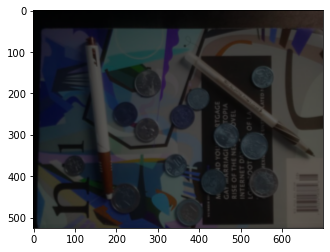

In [24]:
# Reading the Input Image
clutter_img        = cv.imread('../data/proj2-clutter-image.jpg')

##############################
# TO DO: Your Implementation
##############################
g_kernel   = Gaussian_Filter(2)
clutter_smooth_img = cv.filter2D(clutter_img, -1, g_kernel)
################################
# Your Implementation ENDS here
################################

# Saves the Smooth Image in the result directory
cv.imwrite("../results/Ques_3/proj2-clutter-image-smoothed.png", clutter_smooth_img)

# Plots the smoothed image in the notebook
plt.figure(); plt.imshow(clutter_smooth_img.astype(np.uint8));

**Ans -** Smoothing is done to ensure that the noise doesn't affect the edge detection and the better edges the better hough transform can detect lines. Sigma=2 is used for the gaussian filter.

#### 3.2 Identify the edges in the smooth image, generated in the previous step. You can use the solution of Ques 1.2. Save the numpy array as clutter_smooth_img_gray_edge.

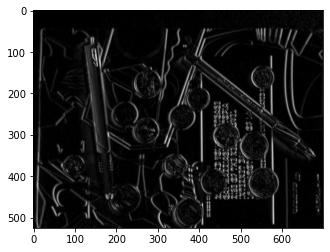

In [25]:
##############################
# TO DO: Your Implementation
##############################
clutter_smooth_img_gray = rgb2gray(clutter_smooth_img)
clutter_smooth_img_gray_edge_h = cv.filter2D(clutter_smooth_img_gray, -1, sobel_horizontal)
clutter_smooth_img_gray_edge_v = cv.filter2D(clutter_smooth_img_gray, -1, sobel_horizontal)
clutter_smooth_img_gray_edge = np.hypot(clutter_smooth_img_gray_edge_h, clutter_smooth_img_gray_edge_v)
clutter_smooth_img_gray_edge = image_uint(clutter_smooth_img_gray_edge)


################################
# Your Implementation ENDS here
################################

# Save the Image
cv.imwrite('../results/Ques_3/clutter_smooth_img_gray_edge.png', clutter_smooth_img_gray_edge)

#Plot the Image
plt.figure(); plt.imshow(clutter_smooth_img_gray_edge.astype(np.uint8), cmap='gray');

#### 3.3 Identify the lines in the Image using Hough Transform

Text(0.5, 1.0, 'Binary Image')

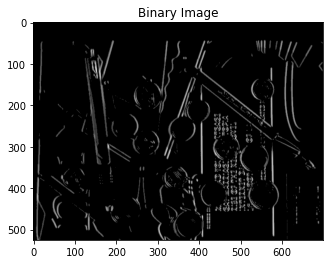

In [26]:
# Invoke the Hough Transform Method to Extract the Lines from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract the lines
# To expedite the process you can play with the resolution of the theta and rho 
# without compromising the quality of the results

clutter_smooth_accumulator, clutter_smooth_thetas, clutter_smooth_rhos, clutter_smooth_binary_img = hough_transform(clutter_smooth_img_gray_edge, threshold=50, theta_res=2, rho_res=2)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_3/Clutter_Smooth_Binary_Image.png', clutter_smooth_binary_img)

#Plot the Binary Image
plt.figure(); plt.imshow(clutter_smooth_binary_img.astype(np.uint8), cmap='gray'); plt.title('Binary Image')

#### 3.4 Draw the detected lines

In [27]:
# Plot the Lines extracted on the Original Image
# Play with the Accumulator Thresholding to get rid of the unwanted lines

plot_lines('../results/Ques_3/proj2-clutter-image-smoothed.png', clutter_smooth_accumulator, clutter_smooth_thetas, clutter_smooth_rhos, 330, save_path='../results/Ques_3/Clutter_Smooth_Image_Output_Lines.png')

#### 3.5 Most likely the last exercise produced several lines which DO NOT repesent the boundaries of the pens. How do you take care of the probem? Discuss.

**Ans -** We can define certain threshold or conditions like the length of the lines or the slope to select the lines that we desire.

#### 3.6 Find the edges which represents only the boundaries of the pens and plot it on the smooth version of the clutter image. 
You need to write a function similar to plot_edges() (but NOT the same).  You will need to check the length of each segment of the line and select only the ones that are above a certain threshold length.  

Save the output image as <b>'../results/Ques_3/Clutter_Smooth_Image_Output_Edges.png'</b>

In [28]:
def plot_edges_th(img_path, accumulator, thetas, rhos, acc_threshold, binary_image, save_path, length_threshold, dist_th, draw_points=False):
    
    '''
    This function plots edges
    This should be used to draw edges along the boundary of the pens
    
    Input:
    1. RGB Image for plotting lines
    2. Accumulator array
    3. Vector of the angle values
    4. Vector of the rho values
    5. Threshold value for selecting lines from the accumulator
    6. Path to save the image with lines drawn on them
    7. Threshold length of the lines to consider
    8. distance threshold between two consecutive points
    
    '''
    image = cv.imread(img_path)
    h,w,c = image.shape
    print(np.max(accumulator))
    line_points = np.where(accumulator>acc_threshold)
    edge_points = np.transpose(np.nonzero(binary_image)).astype(float)
    
        
    for i in range(len(line_points[0])):
        theta = thetas[line_points[1][i]]
        rho = rhos[line_points[0][i]]
        a = math.cos(np.deg2rad(theta))
        b = math.sin(np.deg2rad(theta))

        xt = edge_points[:,1] - (w/2)
        y = (a*xt - rho)/b + (h/2)
        edge_points_new  = np.zeros(edge_points.shape)
        # edge_points_new[:0] = y
        # edge_points_new[:1] = x
        lps = np.where(np.abs(y-edge_points[:,0])<3)
        
        if len(lps[0]) > 1:
            ept = edge_points[lps[0]]
            ept = ept[np.lexsort((ept[:,1],ept[:,0]))]
            dist = np.linalg.norm(ept[0] - ept[-1])
            
            # if dist < length_threshold:
            #     continue
            
            #### Remove unwanted points
            mi = int(len(ept)/2)

            fi = 0
            ei = len(ept) - 1

            for i in range(mi, 1, -1):
                dist_up = np.linalg.norm(ept[i-1] - ept[i])
                if dist_up > dist_th:
                    fi = i
                    break
            
            for i in range(mi, len(ept)-1, 1):
                dist_up = np.linalg.norm(ept[i] - ept[i+1])
                if dist_up > dist_th:
                    ei = i
                    break
                
            ept = ept[fi:ei] 

            min_pt = ept[0].astype(int) #np.min(ept[ept[:, 0] == np.min(ept[:, 0])], 0).astype(int)
            max_pt = ept[-1].astype(int) #np.max(ept[ept[:, 0] == np.max(ept[:, 0])], 0).astype(int)
            dist = np.linalg.norm(max_pt - min_pt)
            # #print(dist)
            
            if dist < length_threshold:
                continue

            #print(dist_)
            cv.line(image, (min_pt[1], min_pt[0]), (max_pt[1], max_pt[0]), (0,0,255), 3, cv.LINE_AA)
            
            if draw_points:
                for i in range(len(ept)):
                    cv.circle(image,(int(ept[i,1]), int(ept[i,0])), 1, (0,255,0), 2)
            
            
    cv.imwrite(save_path, image)

In [29]:
plot_edges_th('../results/Ques_3/proj2-clutter-image-smoothed.png', clutter_smooth_accumulator, \
    clutter_smooth_thetas, clutter_smooth_rhos, 400, clutter_smooth_binary_img, \
        save_path='../results/Ques_3/Clutter_Smooth_Image_Output_Edges.png', length_threshold=300, dist_th=25)

552.0


/Users/janmesh007/anaconda3/envs/proj2/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/Users/janmesh007/anaconda3/envs/proj2/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


### 4. Hough Transform to detect Circles from Cluttered Image (17 points)
In this exercise you are expected to implement Hough Transform for detecting circles from cluttered image. Hough Transform is applied on binary images which can be generated by thresholding the edge detector output.

#### Tasks:
1. Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the circles. Save the smooth image as <b>clutter_smooth_img_circle_detection</b>, numpy array. <b>(2 points)</b>
2. Identify the edges in the smooth image, generated in the previous step. You can use the solution of <b>Ques 1.2</b>. Save the numpy array as <b>clutter_smooth_img_gray_edge_circle_detection</b>. <b>(2 points)</b>
3. Identify the circles in the Image using Hough Transform. <b>(2 points)</b>
4. Draw the detected circles. <b>(2 points)</b>
5. Did the last solution detect any unwanted circles? If yes, please explain the reason. Which parameters you feel are affecting the result. Moreover, what could be the correct measures to prevent this? <b>(5 points)</b>
6. You are required to find boundaries around atleast 8 coins in the image. <b>(4 points)</b>

#### 4.1 Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the circles. Save the smooth image as <b>clutter_smooth_img_circle_detection</b>, numpy array.

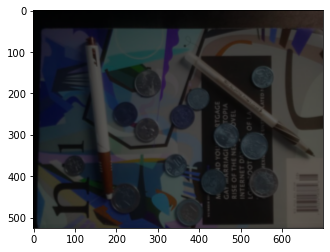

In [30]:
# Reading the Input Image
clutter_img_circle_detection        = cv.imread('../data/proj2-clutter-image.jpg')

##############################
# TO DO: Your Implementation
##############################
g_kernel   = Gaussian_Filter(2)
clutter_smooth_img_circle_detection = cv.filter2D(clutter_img_circle_detection, -1, g_kernel)

################################
# Your Implementation ENDS here
################################

# Saves the Smooth Image in the result directory
cv.imwrite("../results/Ques_4/proj2-clutter-image-smoothed_circle_detection.png", clutter_smooth_img_circle_detection)

# Plots the smoothed image in the notebook
plt.figure(); plt.imshow(clutter_smooth_img_circle_detection.astype(np.uint8));

**Ans -** Smoothing is done to ensure that the noise doesn't affect the edge detection and the better edges the better hough transform can detect circles. Sigma=2 is used for the gaussian filter.

#### 4.2 Identify the circles in the smooth image, generated in the previous step. You can use the solution of <b>Ques 1.2</b>. 
Save the numpy array as <b>clutter_smooth_img_gray_edge_circle_detection</b>.

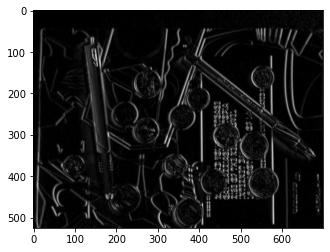

In [31]:
##############################
# TO DO: Your Implementation
##############################

clutter_smooth_img_gray = rgb2gray(clutter_smooth_img)
clutter_smooth_img_gray_edge_circle_detection = cv.filter2D(clutter_smooth_img_gray, -1, sobel_vertical)
clutter_smooth_img_gray_edge_circle_detection = image_uint(clutter_smooth_img_gray_edge_circle_detection)

################################
# Your Implementation ENDS here
################################

# Save the Image
cv.imwrite('../results/Ques_4/Smooth_Clutter_Edge_Image_Circle_Detection.png', clutter_smooth_img_gray_edge_circle_detection)

#Plot the Image
plt.figure(); plt.imshow(clutter_smooth_img_gray_edge.astype(np.uint8), cmap='gray');

#### 4.3 Identify the circles in the Image using Hough Transform

In [32]:
# Invoke the Hough Transform Method to Extract the Circles from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract circles
# To expedite the process you can play with the resolution parameters 
# without compromising the quality of the results

clutter_smooth_circle_accumulator, clutter_smooth_circle_radius_vector, clutter_smooth_circle_center_x_vector, clutter_smooth_circle_center_y_vector, clutter_smooth_circle_img_bin = circle_hough_transform(clutter_smooth_img_gray_edge_circle_detection, threshold=140, min_radius=20, max_radius=40, radius_res=4, angle_res=10)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_4/Smooth_Clutter_Binary_Image_Circle_Detection.png', clutter_smooth_circle_img_bin)

True

#### 4.4 Draw the detected circles

In [33]:
# Plot the Circles extracted on the Smooth Image

plot_circles('../results/Ques_4/proj2-clutter-image-smoothed_circle_detection.png', clutter_smooth_circle_accumulator, clutter_smooth_circle_radius_vector, clutter_smooth_circle_center_x_vector, clutter_smooth_circle_center_y_vector, 10, clutter_smooth_circle_img_bin, '../results/Ques_4/Smooth_Clutter_Image_Output_Circles.png')

387.0


#### 4.5 Did the last solution detect any unwanted circles? If yes, please explain the reason. Which parameters you feel are affecting the result. Moreover, what could be the correct measures to prevent this?

**Ans -** Yes, it detected considerable amount of unwanted circles. Theta resolution might be affecting the results, a better solution will be to use gradient at that point instead of iterating over theta values. We can also give more votes to the stronger edges.

#### 4.6 Devise some mechanisms such that you can find boundaries of atleast 8 coins in the image

In [34]:
def circle_hough_transform_gradients(input_img, threshold, min_radius, max_radius, radius_res, gradients_x, gradients_y):
    
    '''
    This function computes the accumulator array with the circles
    detected in the image uses gradients to determing theta
    
    Input:
    1. Output of the Edge Detection Method
    2. Threshold value for generating the binary image
    3. Min Radius of the Circle to be detected
    4. Max Radius of the Circle to be detected
    5. Resolution for Circle Radius
    6. Gradient x direction
    7. Gradient y direction
    
    Output:
    1. Accumulator array          , declare as accumulator
    2. Array for Circle Center    , declare as center_x_vector, center_y_vector
    3. Array for Radius of Circle , declare as radius_vector
    4. Thresholded Binary Image   , declare as binary_img

    '''

    ############################
    # To DO: Your Implementation
    ############################
    h,w = input_img.shape
    radius_vector = np.arange(min_radius, max_radius, radius_res)
    center_x_vector = np.arange(-w, w, 1)
    center_y_vector = np.arange(-h, h, 1)
    accumulator = np.zeros((len(center_x_vector), len(center_y_vector), len(radius_vector)))
    binary_img = input_img.copy()
    binary_img[binary_img<threshold] = 0
    edge_points = np.transpose(np.nonzero(binary_img))

    for edge_point in edge_points:
        for radius in radius_vector:
            g_x = gradients_x[edge_point[0], edge_point[1]]
            g_y = gradients_y[edge_point[0], edge_point[1]]
            theta = math.atan(g_y/g_x)
            a = edge_point[1] - radius*math.cos(theta)
            b = edge_point[0] - radius*math.sin(theta)
            ai = np.abs(center_x_vector-a).argmin()
            bi = np.abs(center_y_vector-b).argmin()
            ri = np.abs(radius_vector-radius).argmin()
            accumulator[ai, bi, ri] += 1
    
    ################################
    # Your Implementation ENDS here
    ################################

    return accumulator, radius_vector, center_x_vector, center_y_vector, binary_img


/Users/janmesh007/anaconda3/envs/proj2/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


26.0


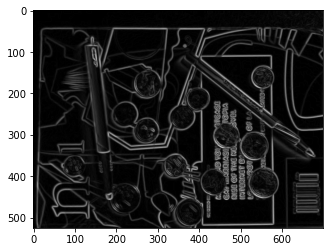

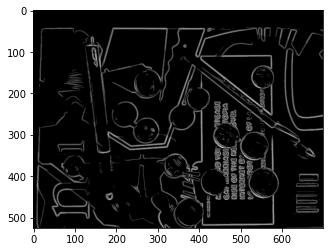

In [35]:
sobel_horizontal = np.array([[1, 0, -1],
                             [2, 0, -2],
                             [1, 0, -1]])

sobel_vertical = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

g_kernel   = Gaussian_Filter(2)
clutter_smooth_img_circle_detection = cv.filter2D(clutter_img_circle_detection, -1, g_kernel)

gray = rgb2gray(clutter_smooth_img_circle_detection)
smooth_img_gray_edge_h = cv.filter2D(gray, -1, sobel_horizontal)
smooth_img_gray_edge_v = cv.filter2D(gray, -1, sobel_vertical)
smooth_img_gray_edge = np.hypot(smooth_img_gray_edge_h, smooth_img_gray_edge_v)

smooth_img_gray_edge_im = image_uint(smooth_img_gray_edge)
plt.figure(); plt.imshow(smooth_img_gray_edge_im.astype(np.uint8), cmap='gray');

clutter_smooth_circle_accumulator, clutter_smooth_circle_radius_vector, clutter_smooth_circle_center_x_vector, \
    clutter_smooth_circle_center_y_vector, clutter_smooth_circle_img_bin = \
        circle_hough_transform_gradients(smooth_img_gray_edge_im, threshold=50, min_radius=20, \
            max_radius=40, radius_res=2, gradients_x=smooth_img_gray_edge_h, gradients_y=smooth_img_gray_edge_v)
        
plt.figure(); plt.imshow(clutter_smooth_circle_img_bin.astype(np.uint8), cmap='gray');
print(np.max(clutter_smooth_circle_accumulator))


In [36]:
## Results saved as - ../results/Ques_4/Smooth_Clutter_Image_Output_Circles_G.png
plot_circles('../results/Ques_4/proj2-clutter-image-smoothed_circle_detection.png', clutter_smooth_circle_accumulator, clutter_smooth_circle_radius_vector, clutter_smooth_circle_center_x_vector, clutter_smooth_circle_center_y_vector, 12, clutter_smooth_circle_img_bin, '../results/Ques_4/Smooth_Clutter_Image_Output_Circles_G.png')

26.0


### 5 Test Robustness to Noise (15 points)
In this exercise, we test the robustness of Hough Transform to Gaussian noise.<br>
For this experiment, consider the optimum setting of the parameters (like sigma for smoothing, threshold for binary image, threshold for accumulator and others) for both line and circle detection using Hough Transform.<br>

Then keep adding Gaussian noise to the clutter image, <b>proj2-clutter-image.jpg</b>, starting with sigma value of 5.0 and doubling the sigma at every step, until the detection of lines and circles substantially fails. Mark this value as the of sigma as the failure sigma value.<br>

Between the starting sigma value i.e., 5.0 and the failure sigma value, show sequence of 5 images (equally spaced as per the number of steps) with the detected lines and circles drawn on them where each image represents different sigma value for the Gaussian noise.<br>

With failure sigma value as noise parameter, generate the noisy image and determine a smoothing filter (Gaussian filter as used earlier) to detect lines and circles from the noisy image. Do not change any other parameters used for extraction of lines and circles.

#### Task
1. Starting with sigma value of 5.0 and doubling the sigma at every step determine the sigma when the line and circle detection using Hough Transform fails. <b>(7 points)</b>
2. Plot sequence of 5 images (equally spaced as per the number of steps) with the detected lines or circles drawn on them where each image represents different sigma value for the Gaussian noise. Save the output images separately for circles and lines with the corresponding sigma values. <b>(5 points)</b>
3. Generate a smoothing filter that can handle the maximum noise and help in the detection of lines and circles from the noisy image. Keep the other parameters similar. Save the output images for circles and lines separately. <b>(3 points)</b>

#### Results:
All the output images should be saved in the directory <b>results/Ques_5/</b> with a meaningful name (as used in previous questions). Use the <b>imwrite</b> function in OpenCV library for saving images. You should use the OpenCV <b>line</b> and <b>circle</b> function to draw lines and circles respectively.  Make sure to save the noisy and filtered images you are generating.  

### For Lines
Optimal Values -
* Smoothing Sigma = 1
* Threshold for Binary Image = 60
* Theta resolution = 2
* Rho resolution = 2
* Accumulator threshold = 360

**Fails at sigma=60**

In [44]:
clutter_img = cv.imread('../data/proj2-clutter-image.jpg')

sobel_horizontal = np.array([[1, 0, -1],
                             [2, 0, -2],
                             [1, 0, -1]])

sobel_vertical = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

sigmas = np.linspace(5,60,5)

for sigma in sigmas:
    noise = np.random.normal(0, sigma, clutter_img.shape)
    clutter_img_noisy = np.clip((clutter_img + noise) ,0, 255)

    g_kernel   = Gaussian_Filter(1)
    clutter_img_noisy_smooth = cv.filter2D(clutter_img_noisy, -1, g_kernel)
    clutter_img_noisy_smooth = image_uint(clutter_img_noisy_smooth)

    cv.imwrite('../results/Ques_5/Clutter_Image_L_Sigma_'+str(sigma)+'.png', clutter_img_noisy_smooth)

    clutter_img_noisy_gray = rgb2gray(clutter_img_noisy_smooth)
    clutter_img_noisy_gray_edge_h = cv.filter2D(clutter_img_noisy_gray, -1, sobel_horizontal)
    clutter_img_noisy_gray_edge_v = cv.filter2D(clutter_img_noisy_gray, -1, sobel_vertical)

    clutter_img_noisy_gray_edge = np.hypot(clutter_img_noisy_gray_edge_h, clutter_img_noisy_gray_edge_v)
    clutter_img_noisy_gray_edge = image_uint(clutter_img_noisy_gray_edge)
    #plt.figure(); plt.imshow(clutter_img_noisy_gray_edge.astype(np.uint8), cmap='gray');

    clutter_img_noisy_accumulator_line, clutter_img_noisy_thetas_line, clutter_img_noisy_rhos_line, clutter_img_noisy_binary_img_line = \
        hough_transform(clutter_img_noisy_gray_edge, threshold=60, theta_res=2, rho_res=2)
    
    cv.imwrite('../results/Ques_5/Clutter_Image_L_Filtered_Sigma_'+str(sigma)+'.png', clutter_img_noisy_binary_img_line)

    plot_lines('../results/Ques_5/Clutter_Image_L_Sigma_'+str(sigma)+'.png', clutter_img_noisy_accumulator_line, clutter_img_noisy_thetas_line, \
        clutter_img_noisy_rhos_line, 360, save_path='../results/Ques_5/Clutter_Image_Noisy_Lines_Sigma_'+str(sigma)+'.png')



### For Circles
Optimal Values -
* Smoothing Sigma = 1
* Threshold for Binary Image = 50
* Min Radius = 15
* Max Radius = 41
* Radius resolution = 2
* Using gradients instead of theta resolution
* Accumulator threshold = 10

**Fails at sigma=40**

In [38]:
clutter_img = cv.imread('../data/proj2-clutter-image.jpg')

sobel_horizontal = np.array([[1, 0, -1],
                             [2, 0, -2],
                             [1, 0, -1]])

sobel_vertical = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

sigmas = np.linspace(5,40,5)

for sigma in sigmas:
    noise = np.random.normal(0, sigma, clutter_img.shape)
    clutter_img_noisy = np.clip((clutter_img + noise) ,0, 255)

    g_kernel   = Gaussian_Filter(1)
    clutter_img_noisy_smooth = cv.filter2D(clutter_img_noisy, -1, g_kernel)
    clutter_img_noisy_smooth = image_uint(clutter_img_noisy_smooth)

    cv.imwrite('../results/Ques_5/Clutter_Image_C_Sigma_'+str(sigma)+'.png', clutter_img_noisy_smooth)

    clutter_img_noisy_gray = rgb2gray(clutter_img_noisy_smooth)
    clutter_img_noisy_gray_edge_h = cv.filter2D(clutter_img_noisy_gray, -1, sobel_horizontal)
    clutter_img_noisy_gray_edge_v = cv.filter2D(clutter_img_noisy_gray, -1, sobel_vertical)

    clutter_img_noisy_gray_edge = np.hypot(clutter_img_noisy_gray_edge_h, clutter_img_noisy_gray_edge_v)
    clutter_img_noisy_gray_edge = image_uint(clutter_img_noisy_gray_edge)

    clutter_noisy_circle_accumulator, clutter_noisy_circle_radius_vector, clutter_noisy_circle_center_x_vector, \
        clutter_noisy_circle_center_y_vector, clutter_noisy_circle_img_bin = \
            circle_hough_transform_gradients(clutter_img_noisy_gray_edge, threshold=50, min_radius=15, \
                max_radius=41, radius_res=2, gradients_x=clutter_img_noisy_gray_edge_h, gradients_y=clutter_img_noisy_gray_edge_v)

    cv.imwrite('../results/Ques_5/Clutter_Image_C_Filtered_Sigma_'+str(sigma)+'.png', clutter_noisy_circle_img_bin)
    
    plot_circles('../results/Ques_5/Clutter_Image_C_Sigma_'+str(sigma)+'.png', clutter_noisy_circle_accumulator, clutter_noisy_circle_radius_vector, \
        clutter_noisy_circle_center_x_vector, clutter_noisy_circle_center_y_vector, 10, clutter_noisy_circle_img_bin, \
            '../results/Ques_5/Clutter_Image_Noise_Circles_Sigma_'+str(sigma)+'.png')


/Users/janmesh007/anaconda3/envs/proj2/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


22.0
16.0
15.0
13.0
13.0


**Correction for Lines** - Using a gaussian smoothing kernel of sigma = 2 

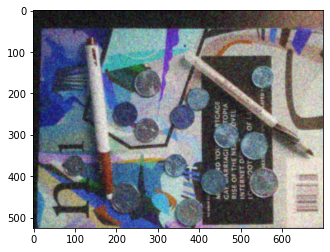

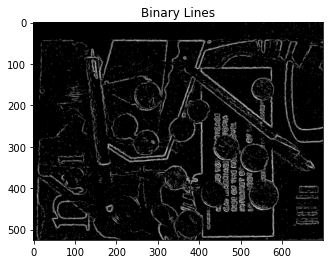

In [39]:
clutter_img = cv.imread('../data/proj2-clutter-image.jpg')

sobel_horizontal = np.array([[1, 0, -1],
                             [2, 0, -2],
                             [1, 0, -1]])

sobel_vertical = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

noise = np.random.normal(0, 60, clutter_img.shape)
clutter_img_noisy = np.clip((clutter_img + noise) ,0, 255)


g_kernel = Gaussian_Filter(2)
clutter_img_noisy_smooth = cv.filter2D(clutter_img_noisy, -1, g_kernel)
clutter_img_noisy_smooth = image_uint(clutter_img_noisy_smooth)
plt.figure(); plt.imshow((clutter_img_noisy_smooth).astype(np.uint8));

cv.imwrite('../results/Ques_5/Clutter_Image_L_Final.png', clutter_img_noisy_smooth)

clutter_img_noisy_gray = rgb2gray(clutter_img_noisy_smooth)
clutter_img_noisy_gray_edge_h = cv.filter2D(clutter_img_noisy_gray, -1, sobel_horizontal)
clutter_img_noisy_gray_edge_v = cv.filter2D(clutter_img_noisy_gray, -1, sobel_vertical)

clutter_img_noisy_gray_edge = np.hypot(clutter_img_noisy_gray_edge_h, clutter_img_noisy_gray_edge_v)
clutter_img_noisy_gray_edge = image_uint(clutter_img_noisy_gray_edge)


clutter_img_noisy_accumulator_line_, clutter_img_noisy_thetas_line_, clutter_img_noisy_rhos_line_, clutter_img_noisy_binary_img_line_ = \
    hough_transform(clutter_img_noisy_gray_edge, threshold=60, theta_res=2, rho_res=2)

#Plot the Binary Image
plt.figure(); plt.imshow(clutter_img_noisy_binary_img_line_.astype(np.uint8), cmap='gray'); plt.title('Binary Lines')
cv.imwrite('../results/Ques_5/Clutter_Image_L_Filtered.png', clutter_img_noisy_binary_img_line_)


plot_lines('../results/Ques_5/Clutter_Image_L_Final.png', clutter_img_noisy_accumulator_line_, clutter_img_noisy_thetas_line_, \
    clutter_img_noisy_rhos_line_, 360, save_path='../results/Ques_5/Clutter_Image_Final_Lines.png')



In [40]:
## couldn't find sigma that corrects line - changing acc threshold here for better output

plot_lines('../results/Ques_5/Clutter_Image_L_Final.png', clutter_img_noisy_accumulator_line_, clutter_img_noisy_thetas_line_, \
    clutter_img_noisy_rhos_line_, 450, save_path='../results/Ques_5/Clutter_Image_Final_Lines2.png')

**Correction for Circles** - Using a gaussian smoothing kernel of sigma = 3 and ksize = 17.

/Users/janmesh007/anaconda3/envs/proj2/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


18.0


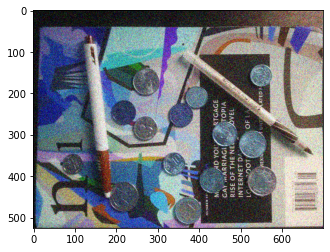

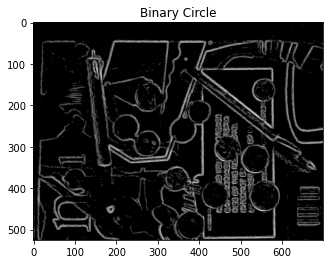

In [41]:
clutter_img = cv.imread('../data/proj2-clutter-image.jpg')

sobel_horizontal = np.array([[1, 0, -1],
                             [2, 0, -2],
                             [1, 0, -1]])

sobel_vertical = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])   

noise = np.random.normal(0, 40, clutter_img.shape)
clutter_img_noisy = np.clip((clutter_img + noise) ,0, 255)

plt.figure(); plt.imshow((clutter_img_noisy).astype(np.uint8));

g_kernel   = Gaussian_Filter(3)
clutter_img_noisy_smooth = cv.filter2D(clutter_img_noisy, -1, g_kernel)
clutter_img_noisy_smooth = image_uint(clutter_img_noisy_smooth)

cv.imwrite('../results/Ques_5/Clutter_Image_C_Final.png', clutter_img_noisy_smooth)


clutter_img_noisy_gray = rgb2gray(clutter_img_noisy_smooth)
clutter_img_noisy_gray_edge_h = cv.filter2D(clutter_img_noisy_gray, -1, sobel_horizontal)
clutter_img_noisy_gray_edge_v = cv.filter2D(clutter_img_noisy_gray, -1, sobel_vertical)

clutter_img_noisy_gray_edge = np.hypot(clutter_img_noisy_gray_edge_h, clutter_img_noisy_gray_edge_v)
clutter_img_noisy_gray_edge = image_uint(clutter_img_noisy_gray_edge)


clutter_noisy_circle_accumulator, clutter_noisy_circle_radius_vector, clutter_noisy_circle_center_x_vector, \
    clutter_noisy_circle_center_y_vector, clutter_noisy_circle_img_bin = \
        circle_hough_transform_gradients(clutter_img_noisy_gray_edge, threshold=50, min_radius=15, \
            max_radius=41, radius_res=2, gradients_x=clutter_img_noisy_gray_edge_h, gradients_y=clutter_img_noisy_gray_edge_v)

plt.figure(); plt.imshow(clutter_noisy_circle_img_bin.astype(np.uint8), cmap='gray'); plt.title('Binary Circle')

cv.imwrite('../results/Ques_5/Clutter_Image_C_Filtered.png', clutter_img_noisy_smooth)

plot_circles('../results/Ques_5/Clutter_Image_C_Final.png', clutter_noisy_circle_accumulator, clutter_noisy_circle_radius_vector, \
    clutter_noisy_circle_center_x_vector, clutter_noisy_circle_center_y_vector, 10, clutter_noisy_circle_img_bin, \
        '../results/Ques_5/Clutter_Image_Final_Circles.png')


### 6 Hough Transform to detect Lines and Circles from a Distorted Image (15 points)
In this exercise you should use your Hough Transform implementation to try and detect lines and circles from the distorted image, <b>proj2-foreshortened-image.jpg</b>. Load the image from the data directory to do all the procesing to extract the lines and circles.


#### Tasks:
1. Plot the edges of the pens and boundaries of the coins, using the functions defined in the previous questions <b>(5 points)</b>
3. How many of the lines and edges in the image did your Hough transform detect? How many additional lines and circles do you see that weren't detected? What differences in appearance, shape, etc. do you notice between those that were and weren't detected? <b>(5 points)</b>
4. Discuss what changes to the alogirhtm you think could help in making the missed lines and circles visible? <b>(5 points)</b>

#### Results:
All the output images should be saved in the directory <b>results/Ques_6/</b> with a meaningful name (as used in previous questions). Use the <b>imwrite</b> function in OpenCV library for saving images. You should use the OpenCV <b>line</b> and <b>circle</b> function to draw lines and circles respectively.

Lines: 665.0


/Users/janmesh007/anaconda3/envs/proj2/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


Circle: 16.0


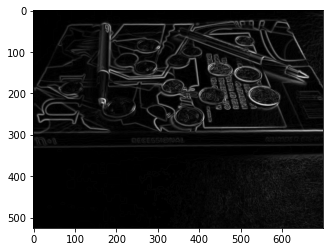

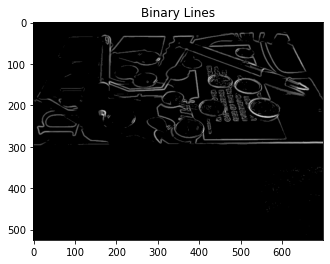

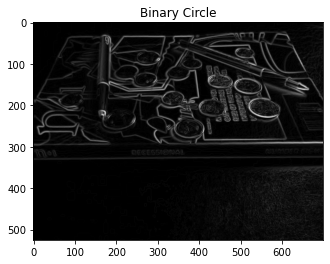

In [42]:
foreshortened_img = cv.imread('../data/proj2-foreshortened-image.jpg')

sobel_horizontal = np.array([[1, 0, -1],
                             [2, 0, -2],
                             [1, 0, -1]])

sobel_vertical = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])


g_kernel   = Gaussian_Filter(2)
foreshortened_img_smooth = cv.filter2D(foreshortened_img, -1, g_kernel)

cv.imwrite('../results/Ques_6/foreshortened_img_smooth.png', foreshortened_img_smooth)


foreshortened_img_gray = rgb2gray(foreshortened_img_smooth)
foreshortened_img_gray_edge_h = cv.filter2D(foreshortened_img_gray, -1, sobel_horizontal)
foreshortened_img_gray_edge_v = cv.filter2D(foreshortened_img_gray, -1, sobel_vertical)

foreshortened_img_gray_edge = np.hypot(foreshortened_img_gray_edge_h, foreshortened_img_gray_edge_v)
foreshortened_img_gray_edge = image_uint(foreshortened_img_gray_edge)
plt.figure(); plt.imshow(foreshortened_img_gray_edge.astype(np.uint8), cmap='gray');


foreshortened_img_accumulator_line, foreshortened_img_thetas_line, foreshortened_img_rhos_line, \
    foreshortened_img_binary_img_line = hough_transform(foreshortened_img_gray_edge, threshold=50, theta_res=2, rho_res=2)

#Plot the Binary Image
plt.figure(); plt.imshow(foreshortened_img_binary_img_line.astype(np.uint8), cmap='gray'); plt.title('Binary Lines')
print("Lines:", np.max(foreshortened_img_accumulator_line))



foreshortened_circle_accumulator, foreshortened_circle_radius_vector, foreshortened_circle_center_x_vector, \
    foreshortened_circle_center_y_vector, foreshortened_circle_img_bin = \
    circle_hough_transform_gradients(foreshortened_img_gray_edge, threshold=50, min_radius=15, \
        max_radius=45, radius_res=2, gradients_x=foreshortened_img_gray_edge_h, gradients_y=foreshortened_img_gray_edge_v)

plt.figure(); plt.imshow(foreshortened_img_gray_edge.astype(np.uint8), cmap='gray'); plt.title('Binary Circle')
print("Circle:", np.max(foreshortened_circle_accumulator))


In [43]:
plot_lines('../results/Ques_6/foreshortened_img_smooth.png', foreshortened_img_accumulator_line, foreshortened_img_thetas_line, \
    foreshortened_img_rhos_line, 420, '../results/Ques_6/foreshortened_img_lines.png')

plot_edges_th('../results/Ques_6/foreshortened_img_smooth.png', foreshortened_img_accumulator_line, foreshortened_img_thetas_line, \
    foreshortened_img_rhos_line, 420, foreshortened_img_gray_edge, '../results/Ques_6/foreshortened_img_edges.png', 200, 20, False)

plot_circles('../results/Ques_6/foreshortened_img_smooth.png', foreshortened_circle_accumulator, foreshortened_circle_radius_vector, \
    foreshortened_circle_center_x_vector, foreshortened_circle_center_y_vector, 9, foreshortened_circle_img_bin, \
        '../results/Ques_6/foreshortened_img_circles.png')

665.0
16.0


**Ans_2 -** It detected approximately 10-12 lines. Expect for 2-3 lines correpsonding to the pen boundary all others seem new. Most new line detected correspond to the boundaries of books or the one whose edge lengths have increased due to the projection effect. 
For circles, most circles correpond to the coins the image, expect for some like the one on pen than gives circular edge when view from different angle.

**Ans_3 -** For lines, it will be a better idea to use gradients of the point to define the theta for line detection as looping over thetas at some interval is bound to miss some values. For circles it would be a better idea to just use ellipse equation to detect ellipses as it will be abel to properly detect coins seen from most projections and can even detect circles.